https://www.tensorflow.org/tutorials/images/cnn

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("train_images Shape:", train_images.shape)
print("test_images Shape:", test_images.shape)

170498071/170498071 [==============================] - 22s 0us/step
train_images Shape: (50000, 32, 32, 3)
test_images Shape: (10000, 32, 32, 3)


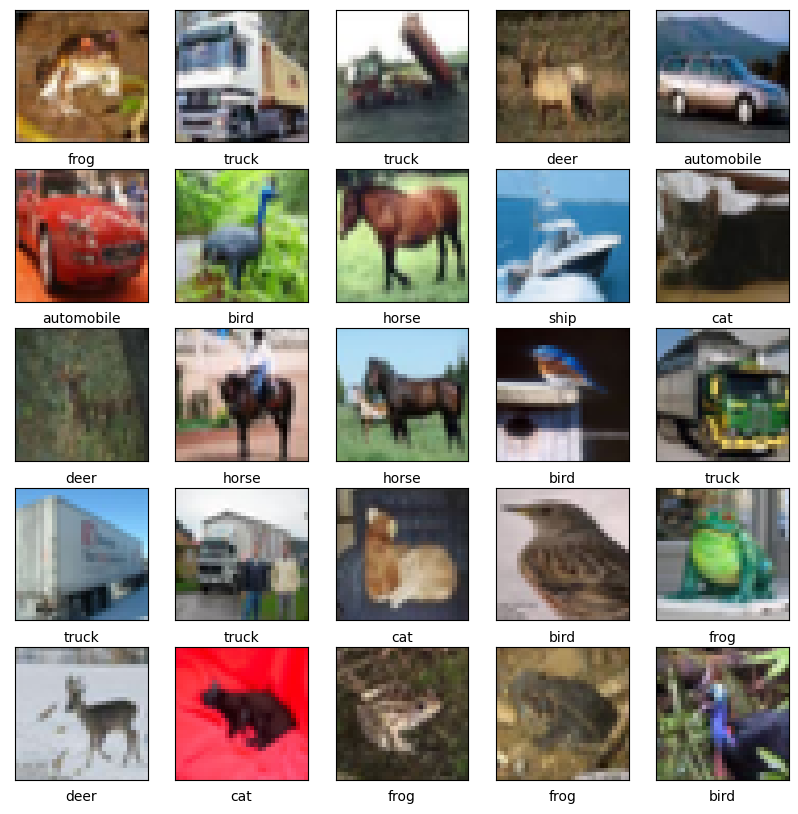

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

2023-03-21 17:09:39.843983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5253 - accuracy: 0.4454 - val_loss: 1.3253 - val_accuracy: 0.5251
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1754 - accuracy: 0.5833 - val_loss: 1.1089 - val_accuracy: 0.6124
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0246 - accuracy: 0.6392 - val_loss: 0.9785 - val_accuracy: 0.6594
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9205 - accuracy: 0.6780 - val_loss: 1.0261 - val_accuracy: 0.6424
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8562 - accuracy: 0.6973 - val_loss: 0.9004 - val_accuracy: 0.6894
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7983 - accuracy: 0.7215 - val_loss: 0.8968 - val_accuracy: 0.6974
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7470 - accuracy: 0.7379 - val_loss: 0.8632 -

313/313 - 1s - loss: 0.8782 - accuracy: 0.7067 - 949ms/epoch - 3ms/step
test_acc: 0.7067000269889832


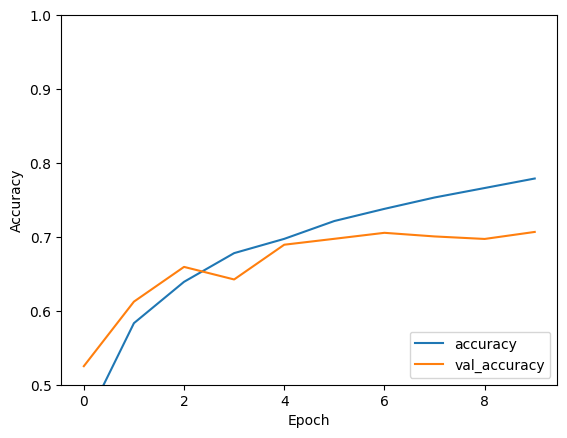

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("test_acc:", test_acc)